In [ ]:
#importammos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [61]:
# Cargar los datos de los archivos CSV
#funcion para importar los datos 
rutas = {
    'oro': ['data/Datos_oro2.csv', 'data/Datos_oro.csv'],
    'platino': ['data/Datos_platino.csv'],
    'plata': ['data/Datos_plata2.csv', 'data/Datos_plata.csv'],
    'petroleo': ['data/Datos_petroleo2.csv', 'data/Datos_petroleo.csv'],
    'plomo': ['data/Datos_plomo.csv'],
    'cacao': ['data/Datos_cacao2.csv', 'data/Datos_cacao.csv'],
    'cafe': ['data/Datos_cafe2.csv', 'data/Datos_cafe.csv'],
    'paladio': ['data/Datos_paladio.csv'],
    'gas_natural': ['data/Datos_gas_natural2.csv', 'data/Datos_gas_natural.csv'],
    'cobre': ['data/Datos_cobre2.csv', 'data/Datos_cobre.csv']
}

def importar_datos(rutas):
    dfs = {}
    for key, ruta in rutas.items():
        dfs[key]= pd.concat([pd.read_csv(r, decimal=',', thousands='.') for r in ruta], axis=0)
        dfs[key].reset_index(drop=True, inplace=True)
    return dfs

In [62]:
#diccionario con los dataframes
#llamamos a la funcion
df_funcion=importar_datos(rutas)

In [63]:
#juntamos los dataframes en uno solo uniendolos por la fecha 
def unir_dataframes(df):
    for i in df:
        if i == list(df.keys())[0]:
            #si es el primer dataframe lo guardamos en df_unido
            df_unido= pd.DataFrame(df[i])
            materia_anterior = i
        else:
            df_unido=df_unido.merge(df[i], on='Fecha', how='outer')
            #renombramos las columnas para que no se repitan
            #_x es el primer dataframe y _y el segundo dataframe
            df_unido.columns = df_unido.columns.str.replace('_x','_'+materia_anterior).str.replace('_y','_'+i)
            materia_anterior = i
    return df_unido

In [108]:
df= unir_dataframes(df_funcion)

In [109]:
def convertir_fecha(df):
    # Convertir la columna 'Fecha' a tipo datetime
    # Preprocesar las fechas para añadir separadores si faltan
    df['Fecha'] = df['Fecha'].astype(str)  # Asegurarse de que la columna 'Fecha' es de tipo string
    df['Fecha'] = df['Fecha'].str.zfill(8)  # Asegurarse de que todas las fechas tengan al menos 8 caracteres
    df['Fecha'] = df['Fecha'].str.replace(r'(\d{2})(\d{2})(\d{4})', r'\1/\2/\3', regex=True)

    # Convertir la columna 'Fecha' a tipo datetime
    df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y', errors='coerce')
    #ordenamos el dataframe por la fecha
    df = df.sort_values(by='Fecha')
    #reseteamos el indice
    df = df.reset_index(drop=True)
    #hacer una columna con el dia de la semana
    df['Dia_semana'] = df['Fecha'].dt.day_name()
    return df
df=convertir_fecha(df)

In [111]:
def convertir_var_float(df):
    #si la columna contiene 'var' la convertimos a float
    #sustituimos el % por nada y el , por .
    #convertimos a float
    df.loc[:, df.columns.str.contains('var')] = df.loc[:, df.columns.str.contains('var')].replace('%', '', regex=True).replace(',', '.', regex=True).astype(float)
    return df
df=convertir_var_float(df)

In [112]:
df.head()


,Fecha,Último_oro,Apertura_oro,Máximo_oro,Mínimo_oro,Vol._oro,% var._oro,Último_platino,Apertura_platino,Máximo_platino,Mínimo_platino,Vol._platino,% var._platino,Último_plata,Apertura_plata,Máximo_plata,Mínimo_plata,Vol._plata,% var._plata,Último_petroleo,Apertura_petroleo,Máximo_petroleo,Mínimo_petroleo,Vol._petroleo,% var._petroleo,Último_plomo,Apertura_plomo,Máximo_plomo,Mínimo_plomo,Vol._plomo,% var._plomo,Último_cacao,Apertura_cacao,Máximo_cacao,Mínimo_cacao,Vol._cacao,% var._cacao,Último_cafe,Apertura_cafe,Máximo_cafe,Mínimo_cafe,Vol._cafe,% var._cafe,Último_paladio,Apertura_paladio,Máximo_paladio,Mínimo_paladio,Vol._paladio,% var._paladio,Último_gas_natural,Apertura_gas_natural,Máximo_gas_natural,Mínimo_gas_natural,Vol._gas_natural,% var._gas_natural,Último_cobre,Apertura_cobre,Máximo_cobre,Mínimo_cobre,Vol._cobre,% var._cobre,Dia_semana
0,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,830.0,840.0,846.0,820.0,"2,43K",-0.84,116.50,122.25,124.00,116.10,"6,64K",-7.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday
1,2000-01-04,283.7,289.5,289.5,280.0,"21,62K",-2.04,NaN,NaN,NaN,NaN,NaN,NaN,5.375,5.420,5.420,5.32,"27,56K",-1.43,25.55,25.20,25.69,24.71,"74,79K",-0.2,NaN,NaN,NaN,NaN,NaN,NaN,836.0,828.0,841.0,823.0,"1,96K",0.72,116.25,116.25,120.50,115.75,"5,49K",-0.21,NaN,NaN,NaN,NaN,NaN,NaN,2.176,2.130,2.20,2.130,"30,15K",-6.57,0.8480,0.8615,0.8620,0.8450,"12,25K",-1.74,Tuesday
2,2000-01-05,282.1,283.7,285.0,281.0,"25,45K",-0.56,NaN,NaN,NaN,NaN,NaN,NaN,5.210,5.375,5.380,5.16,"13,52K",-3.07,24.91,25.50,25.61,24.87,"70,94K",-2.5,NaN,NaN,NaN,NaN,NaN,NaN,831.0,840.0,850.0,828.0,"3,98K",-0.6,118.60,115.00,121.00,115.00,"6,17K",2.02,NaN,NaN,NaN,NaN,NaN,NaN,2.168,2.180,2.20,2.125,"27,95K",-0.37,0.8565,0.8450,0.8590,0.8380,"9,24K",1.0,Wednesday
3,2000-01-06,282.4,281.6,282.8,280.2,"19,06K",0.11,NaN,NaN,NaN,NaN,NaN,NaN,5.167,5.205,5.215,5.15,"4,73K",-0.83,24.78,24.80,25.34,24.51,"85,25K",-0.52,NaN,NaN,NaN,NaN,NaN,NaN,841.0,825.0,847.0,824.0,"3,45K",1.2,116.85,119.00,121.40,116.50,"5,09K",-1.48,NaN,NaN,NaN,NaN,NaN,NaN,2.196,2.165,2.22,2.135,"29,07K",1.29,0.8530,0.8560,0.8565,0.8480,"6,94K",-0.41,Thursday
4,2000-01-07,282.9,282.5,284.5,282.0,"11,27K",0.18,NaN,NaN,NaN,NaN,NaN,NaN,5.195,5.170,5.215,5.15,"5,38K",0.54,24.22,24.65,25.00,24.15,"91,83K",-2.26,NaN,NaN,NaN,NaN,NaN,NaN,853.0,846.0,855.0,836.0,"5,01K",1.43,114.15,117.25,117.75,113.80,"6,86K",-2.31,NaN,NaN,NaN,NaN,NaN,NaN,2.173,2.195,2.23,2.155,"28,46K",-1.05,0.8540,0.8530,0.8625,0.8495,"6,23K",0.12,Friday


In [113]:
#Transformaciones
def limpiar_datos(df):
    #borramos la columna vol de todas las materias primas ya que no es relevante para el analisis ya que el porcentaje indica lo mismo y esta mas completo.
    df_limpio= df.drop(columns=['Vol._oro','Vol._platino','Vol._plata','Vol._petroleo','Vol._plomo','Vol._cacao','Vol._cafe','Vol._paladio','Vol._gas_natural','Vol._cobre'], axis='columns')
    return df_limpio
df_sin_var= limpiar_datos(df)

In [114]:
#quitar los domingos de los datos 
def quitar_domingos(df):
    # Convertir la columna 'Dia_semana' a tipo string
    df['Dia_semana'] = df['Dia_semana'].astype(str)
    # Filtrar los datos para eliminar los domingos
    df_sin_domingos = df[df['Dia_semana'] != 'Sunday']
    return df_sin_domingos
df_sin_domingos= quitar_domingos(df_sin_var)

In [115]:
#quitar filas casi vacias, cogemos los datos cuando solo hay datos de 3 materias primas y el resto son nan
def quitar_datos_casi_vacios(df):
    # Crear una copia del DataFrame para evitar modificar el original
    df_vacios = df.copy()
    # Contar el número de valores no nulos en cada fila
    conteo_no_nulos = df_vacios.notnull().sum(axis=1)
    # Filtrar las filas donde el conteo de valores no nulos es menor que 15 ya que hay 5 columnas por cada materia y si hay menos datos de 15 ha de ser festivo o un dato que no nos interese ya que no tiene valores suficientes.
    df_vacios = df_vacios[conteo_no_nulos > 20]
    #reestablecer el indice
    df_vacios=df_vacios.reset_index(drop=True)
    return df_vacios
df_sin_pocos_datos= quitar_datos_casi_vacios(df_sin_domingos)

In [117]:
df_sin_pocos_datos.head()

,Fecha,Último_oro,Apertura_oro,Máximo_oro,Mínimo_oro,% var._oro,Último_platino,Apertura_platino,Máximo_platino,Mínimo_platino,% var._platino,Último_plata,Apertura_plata,Máximo_plata,Mínimo_plata,% var._plata,Último_petroleo,Apertura_petroleo,Máximo_petroleo,Mínimo_petroleo,% var._petroleo,Último_plomo,Apertura_plomo,Máximo_plomo,Mínimo_plomo,% var._plomo,Último_cacao,Apertura_cacao,Máximo_cacao,Mínimo_cacao,% var._cacao,Último_cafe,Apertura_cafe,Máximo_cafe,Mínimo_cafe,% var._cafe,Último_paladio,Apertura_paladio,Máximo_paladio,Mínimo_paladio,% var._paladio,Último_gas_natural,Apertura_gas_natural,Máximo_gas_natural,Mínimo_gas_natural,% var._gas_natural,Último_cobre,Apertura_cobre,Máximo_cobre,Mínimo_cobre,% var._cobre,Dia_semana
0,2000-01-04,283.7,289.5,289.5,280.0,-2.04,NaN,NaN,NaN,NaN,NaN,5.375,5.420,5.420,5.32,-1.43,25.55,25.20,25.69,24.71,-0.2,NaN,NaN,NaN,NaN,NaN,836.0,828.0,841.0,823.0,0.72,116.25,116.25,120.50,115.75,-0.21,NaN,NaN,NaN,NaN,NaN,2.176,2.130,2.200,2.130,-6.57,0.8480,0.8615,0.8620,0.8450,-1.74,Tuesday
1,2000-01-05,282.1,283.7,285.0,281.0,-0.56,NaN,NaN,NaN,NaN,NaN,5.210,5.375,5.380,5.16,-3.07,24.91,25.50,25.61,24.87,-2.5,NaN,NaN,NaN,NaN,NaN,831.0,840.0,850.0,828.0,-0.6,118.60,115.00,121.00,115.00,2.02,NaN,NaN,NaN,NaN,NaN,2.168,2.180,2.200,2.125,-0.37,0.8565,0.8450,0.8590,0.8380,1.0,Wednesday
2,2000-01-06,282.4,281.6,282.8,280.2,0.11,NaN,NaN,NaN,NaN,NaN,5.167,5.205,5.215,5.15,-0.83,24.78,24.80,25.34,24.51,-0.52,NaN,NaN,NaN,NaN,NaN,841.0,825.0,847.0,824.0,1.2,116.85,119.00,121.40,116.50,-1.48,NaN,NaN,NaN,NaN,NaN,2.196,2.165,2.220,2.135,1.29,0.8530,0.8560,0.8565,0.8480,-0.41,Thursday
3,2000-01-07,282.9,282.5,284.5,282.0,0.18,NaN,NaN,NaN,NaN,NaN,5.195,5.170,5.215,5.15,0.54,24.22,24.65,25.00,24.15,-2.26,NaN,NaN,NaN,NaN,NaN,853.0,846.0,855.0,836.0,1.43,114.15,117.25,117.75,113.80,-2.31,NaN,NaN,NaN,NaN,NaN,2.173,2.195,2.230,2.155,-1.05,0.8540,0.8530,0.8625,0.8495,0.12,Friday
4,2000-01-10,282.7,282.4,283.9,281.8,-0.07,NaN,NaN,NaN,NaN,NaN,5.190,5.190,5.230,5.17,-0.1,24.67,24.22,24.75,24.02,1.86,NaN,NaN,NaN,NaN,NaN,839.0,845.0,855.0,837.0,-1.64,117.55,123.50,126.00,116.70,2.98,NaN,NaN,NaN,NaN,NaN,2.216,2.180,2.255,2.165,1.98,0.8465,0.8530,0.8545,0.8400,-0.88,Monday


In [116]:
#guardar el dataframe limpio en un csv
df_sin_pocos_datos.to_csv('data/dataset_recortado.csv', index=False)

In [80]:
df_sin_pocos_datos.isna().sum()


Fecha                      0
Último_oro                73
Apertura_oro              73
Máximo_oro                73
Mínimo_oro                73
% var._oro                73
Último_platino          2452
Apertura_platino        2452
Máximo_platino          2452
Mínimo_platino          2452
% var._platino          2452
Último_plata              16
Apertura_plata            16
Máximo_plata              16
Mínimo_plata              16
% var._plata              16
Último_petroleo           26
Apertura_petroleo         26
Máximo_petroleo           26
Mínimo_petroleo           26
% var._petroleo           26
Último_plomo            2334
Apertura_plomo          2334
Máximo_plomo            2334
Mínimo_plomo            2334
% var._plomo            2334
Último_cacao             113
Apertura_cacao           113
Máximo_cacao             113
Mínimo_cacao             113
% var._cacao             113
Último_cafe              109
Apertura_cafe            109
Máximo_cafe              109
Mínimo_cafe   

In [120]:
#rellenar los nas de antes de salir al mercado del paladio, platino y plomo 
def rellenar_datos_cortos(df):
    # Crear una copia del DataFrame para evitar modificar el original
    df_rellenado = df.copy()
    # Definir las columnas a rellenar que contengan paladio, platino y plomo
    columnas_a_rellenar = [col for col in df.columns if 'paladio' in col or 'platino' in col or 'plomo' in col]
    # Iterar sobre las columnas a rellenar
    for col in columnas_a_rellenar:
        #buscar el primer valor no nulo
        primer_valor_no_nulo = df_rellenado[col].first_valid_index()
        # Rellenar los valores NaN antes de ese valor con el primer valor no nulo encontrado
        if primer_valor_no_nulo is not None:
            valor_a_rellenar = df_rellenado[col].loc[primer_valor_no_nulo]
            df_rellenado.loc[:primer_valor_no_nulo, col] = df_rellenado.loc[:primer_valor_no_nulo, col].fillna(valor_a_rellenar)
    return df_rellenado
df_rellenado= rellenar_datos_cortos(df_sin_pocos_datos)

C:\Users\lidia\AppData\Local\Temp\ipykernel_8112\709802792.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_rellenado.loc[:primer_valor_no_nulo, col] = df_rellenado.loc[:primer_valor_no_nulo, col].fillna(valor_a_rellenar)
C:\Users\lidia\AppData\Local\Temp\ipykernel_8112\709802792.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_rellenado.loc[:primer_valor_no_nulo, col] = df_rellenado.loc[:primer_valor_no_nulo, col].fillna(valor_a_rellenar)
C:\Users\lidia\AppData\Local\Temp\ipykernel_8112\709802792.py:14: FutureWarning: Downcasting object dt

In [ ]:
#rellenar los nas con el valor anterior de la misma columna
def rellenar_datos(df):
    # Crear una copia del DataFrame para evitar modificar el original
    df_rellenado = df.copy()
    # Rellenar los valores NaN con el valor anterior de la misma columna
    df_rellenado.fillna(method='ffill', inplace=True)
    return df_rellenado
df_limpio= rellenar_datos(df_rellenado)

C:\Users\lidia\AppData\Local\Temp\ipykernel_8112\2364952086.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_rellenado.fillna(method='ffill', inplace=True)
C:\Users\lidia\AppData\Local\Temp\ipykernel_8112\2364952086.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_rellenado.fillna(method='ffill', inplace=True)


In [123]:
df_limpio.isna().sum()

Fecha                   0
Último_oro              0
Apertura_oro            0
Máximo_oro              0
Mínimo_oro              0
% var._oro              0
Último_platino          0
Apertura_platino        0
Máximo_platino          0
Mínimo_platino          0
% var._platino          0
Último_plata            0
Apertura_plata          0
Máximo_plata            0
Mínimo_plata            0
% var._plata            0
Último_petroleo         0
Apertura_petroleo       0
Máximo_petroleo         0
Mínimo_petroleo         0
% var._petroleo         0
Último_plomo            0
Apertura_plomo          0
Máximo_plomo            0
Mínimo_plomo            0
% var._plomo            0
Último_cacao            0
Apertura_cacao          0
Máximo_cacao            0
Mínimo_cacao            0
% var._cacao            0
Último_cafe             0
Apertura_cafe           0
Máximo_cafe             0
Mínimo_cafe             0
% var._cafe             0
Último_paladio          0
Apertura_paladio        0
Máximo_palad

In [124]:
df_limpio.to_csv('data/dataset_limpio.csv', index=False)


In [ ]:
# Generar estadisticas descriptivas
 
def estadisticas_descriptivas(df):
    #coger solo las columnas numericas
    df_numerico = df.select_dtypes(include=[np.number])
    # Calcular estadísticas descriptivas para cada columna numérica
    estadisticas = df_numerico.describe()
    # Calcular la correlación entre las columnas numéricas
    correlacion = df_numerico.corr()
    
    return estadisticas, correlacion

#aplicar la funcion generar estadisticas descriptivas a todos los datos que contengan la palabra 'ultimo' 
estadisticas, correlacion = estadisticas_descriptivas(df_limpio_ultimo)


In [ ]:
estadisticas

,Último_oro,Último_platino,Último_plata,Último_petroleo,Último_plomo,Último_cacao,Último_cafe,Último_paladio,Último_gas_natural,Último_cobre
count,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000
mean,1171.072583,1237.903187,17.094116,63.973134,1915.551735,2577.804572,137.303351,831.810861,4.385169,2.746385
std,616.559500,257.607097,8.726933,24.966118,311.336764,1528.700925,59.254052,618.036359,2.188405,1.156530
min,256.600000,595.200000,4.028000,11.570000,848.000000,674.000000,41.500000,162.100000,1.544000,0.608500
25%,613.875000,977.787500,10.806250,44.737500,1611.500000,1801.500000,102.400000,351.100000,2.799000,2.040625
50%,1234.600000,1367.900000,16.801000,63.470000,1937.500000,2395.000000,125.200000,667.700000,3.742000,2.980750
75%,1640.425000,1367.900000,23.020750,81.692500,2142.500000,2868.000000,167.150000,982.612500,5.468000,3.611125
max,3150.300000,1917.400000,48.599000,145.290000,2926.000000,12646.000000,425.100000,3289.000000,15.378000,5.218500


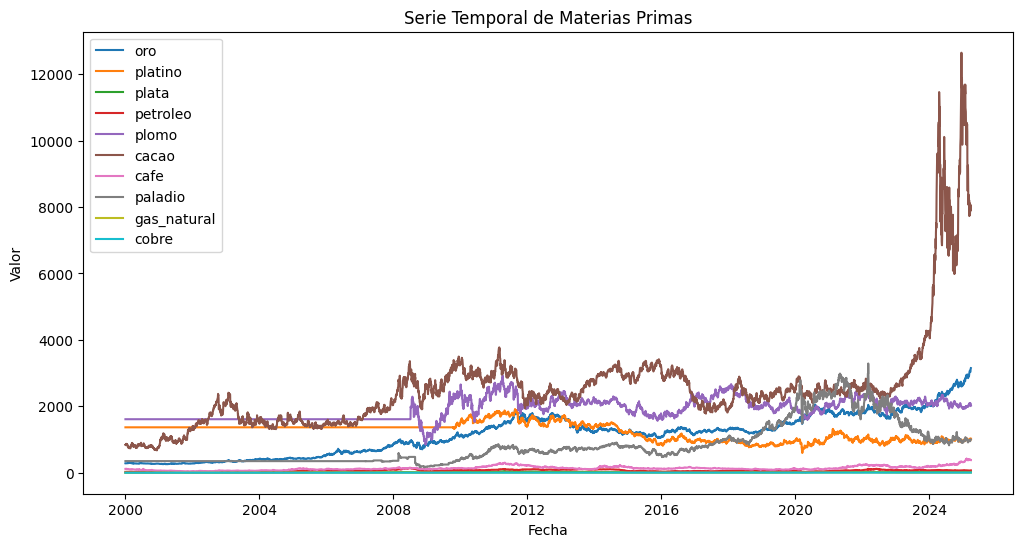

<Figure size 640x480 with 0 Axes>

In [250]:
#grafico serie temporal de los datos
def grafico_temporal_materias(df):
    # Configurar el tamaño de la figura
    plt.figure(figsize=(12, 6))
    #coger las columnas que contengan la palabra 'Último'
    columnas = [col for col in df.columns if 'Último' in col]
    # Graficar cada columna en el DataFrame
    for col in columnas:
        #graficamos el resto de materias primas
        plt.plot(df['Fecha'], df[col], label=col)
    # Configurar el título y las etiquetas de los ejes
    plt.title('Serie Temporal de Materias Primas')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    # Mostrar la leyenda sin la palabra 'Último'
    plt.legend([col.replace('Último_', '') for col in columnas], loc='upper left')
    # Mostrar el gráfico
    plt.show()
    #guardar el grafico
    plt.savefig('graficos/grafico_temporal.png', dpi=300, bbox_inches='tight')

grafico_temporal_materias(df_limpio)

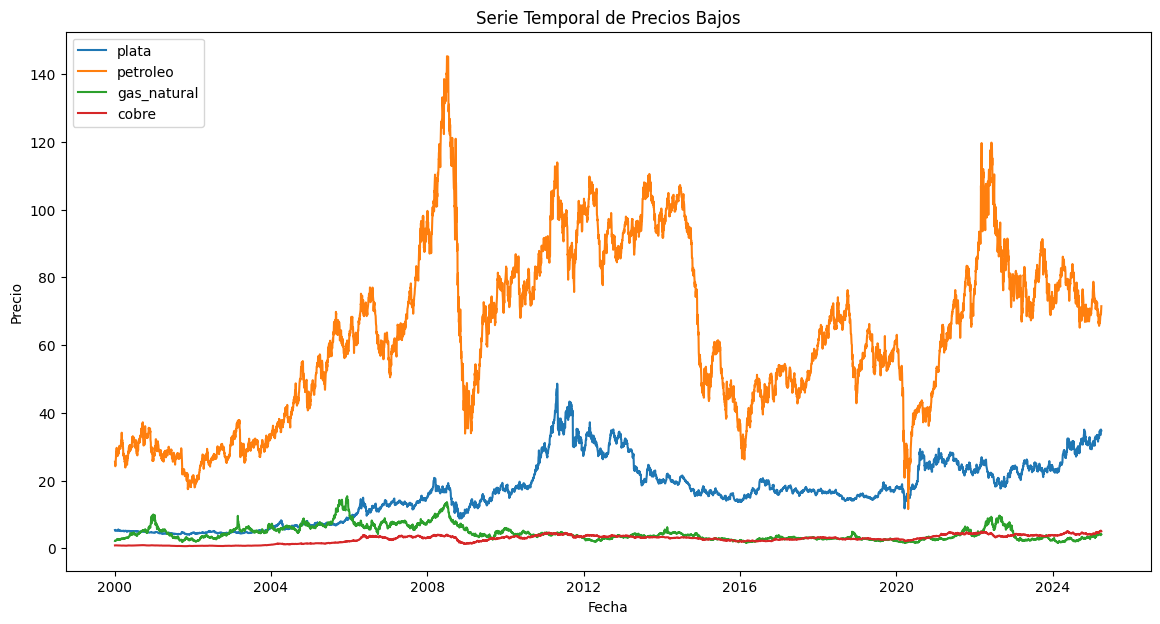

In [251]:
#grafico temporal de la correlacion entre el oro y el petroleo
def grafico_temporal_precios_bajos(df):
    #tamano del grafico
    plt.figure(figsize=(14, 7))
    columnas_bajos = []
    #coger las columnas que contengan la palabra 'Ultimo' y pertenezca a plata,petroleo, cafe, gas natural y cobre
    for i in df.columns:
        if 'Último' in i and ('plata' in i or 'petroleo' in i or 'gas_natural' in i or 'cobre' in i):
            columnas_bajos.append(i)
    # Graficar cada columna en el DataFrame
    for columna in columnas_bajos:
        plt.plot(df['Fecha'], df[columna], label=columna)

    plt.title('Serie Temporal de Precios Bajos')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend([col.replace('Último_', '') for col in columnas_bajos], loc='upper left')
    #guardar el grafico
    plt.savefig('graficos/grafico_temporal_precios_bajos.png', dpi=300, bbox_inches='tight')

grafico_temporal_precios_bajos(df_limpio)

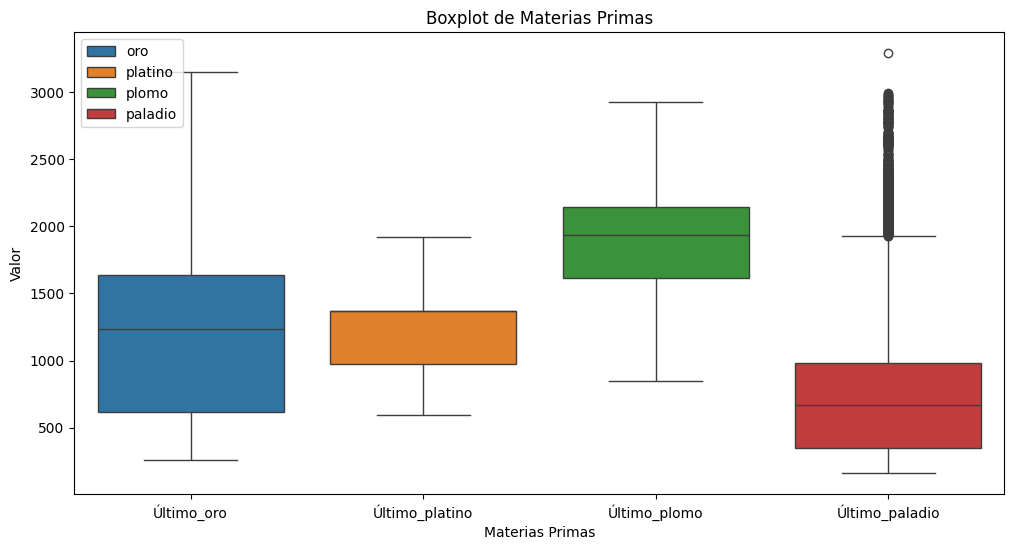

<Figure size 640x480 with 0 Axes>

In [ ]:
#hacemos un grafico de boxplots juntos de las materias que tienen valores intermedios

def grafico_boxplot_medios(df):
    # Configurar el tamaño de la figura
    plt.figure(figsize=(12, 6))
    #coger las columnas que contengan la palabra 'Ultimo'
    columnas = [col for col in df.columns if 'Último' in col and ('oro' in col or 'platino' in col or 'plomo' in col or 'paladio' in col)]
    # Graficar cada columna en el DataFrame
    sns.boxplot(df[columnas])
    # Configurar el título y las etiquetas de los ejes
    plt.title('Boxplot de Materias Primas')
    #Mostrar las etiquetas de las filas sin la palabra 'Ultimo'
    plt.xlabel('Materias Primas')
    plt.ylabel('Valor')
    # Mostrar la leyenda sin la palabra 'Último'
    plt.legend([col.replace('Último_', '') for col in columnas], loc='upper left')
    # Mostrar el gráfico
    plt.show()
    #guardar el grafico
    plt.savefig('graficos/grafico_boxplot_medios.png', dpi=300, bbox_inches='tight')


grafico_boxplot_medios(df_limpio)

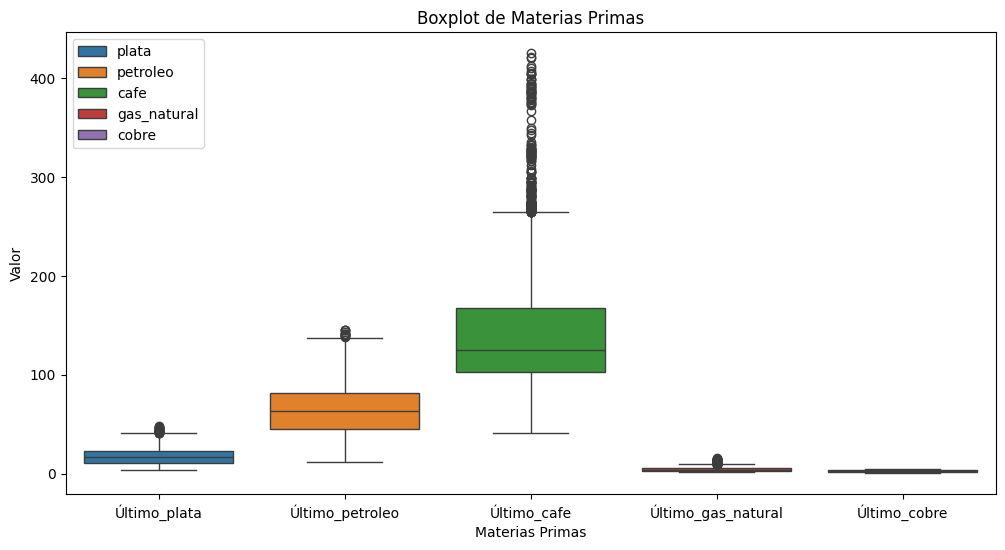

<Figure size 640x480 with 0 Axes>

In [257]:
#hacemos un grafico de boxplots juntos de las materias que tienen valores bajos

def grafico_boxplot_bajos(df):
    # Configurar el tamaño de la figura
    plt.figure(figsize=(12, 6))
    #coger las columnas que contengan la palabra 'Ultimo'
    columnas = [col for col in df.columns if 'Último' in col and ('plata' in col or 'petroleo' in col or 'gas_natural' in col or 'cafe' in col in col or 'cobre' in col)]
    # Graficar cada columna en el DataFrame
    sns.boxplot(data=df[columnas])
    # Configurar el título y las etiquetas de los ejes
    plt.title('Boxplot de Materias Primas')
    plt.xlabel('Materias Primas')
    plt.ylabel('Valor')
    plt.legend([col.replace('Último_', '') for col in columnas], loc='upper left')

    # Mostrar el gráfico
    plt.show()
    #guardar el grafico
    plt.savefig('graficos/grafico_boxplot_bajos.png', dpi=300, bbox_inches='tight')

grafico_boxplot_bajos(df_limpio)

## Inferencia

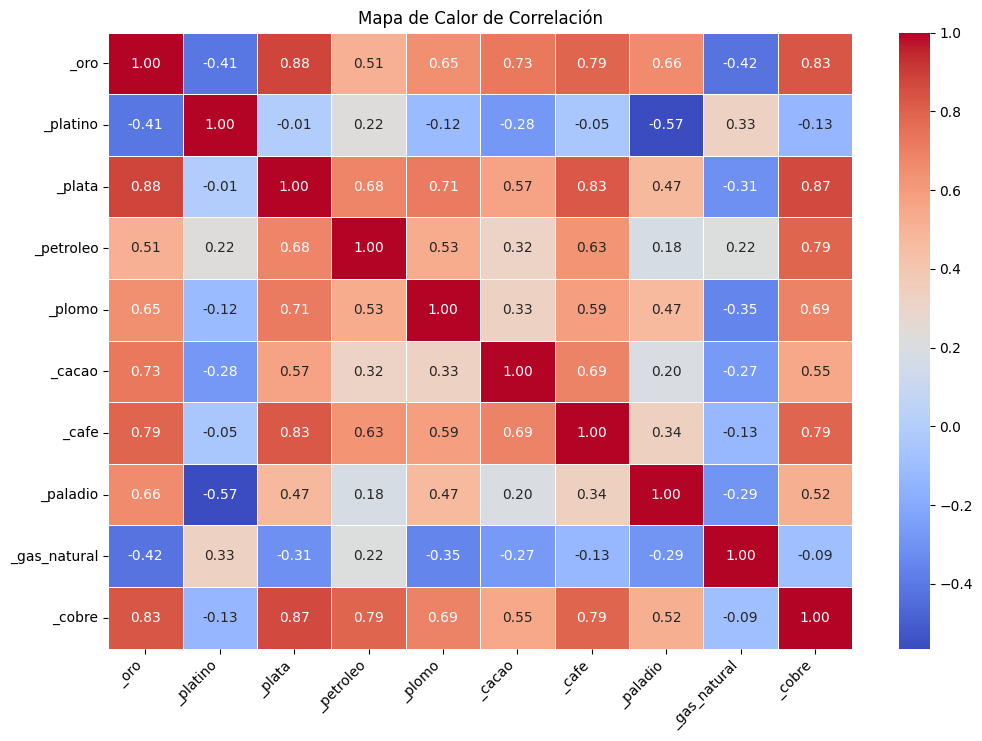

In [258]:
#hacer un grafico de correlacion
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))
# Crear el mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de Correlación')
#quitar la palabra ultimo de las etiquetas del eje x e y
correlacion.columns = correlacion.columns.str.replace('Último_', '')
correlacion.index = correlacion.index.str.replace('Último_', '')
# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
#guardar el grafico
plt.savefig('graficos/grafico_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

Vemos la lista de las materias que estan mas correlacionadas:
- oro: 88% con la plata y 83% con el cobre 
- petroleo: 79% con el cobre 
- plata: 87% con el cobre y 83% con el café 
- café: a demas de la plata, 79% con el cobre

## Contraste de hipotesis